<h1>Machine learning - HW4</h1>
<h1>Navid Ashraf</h1>
<h2>libraries</h2>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

<h2>Question 1</h2>
<p>Suppose based on medical observations, the probability of a positive test (T) is 95% for sick patients (S) and 15% for healthy patients (S'). Additionally, statistics show that 0.5% of all people are diseased. Calculate the following:</p>
<strong>a.</strong> The probability that a person is sick given a positive test result.<br>
<strong>b.</strong> The probability that a person is healthy given a negative test result.<br>
<strong>c.</strong> The probability of misdiagnosis either a person is healthy or sick.<br>

<h2>Answer:</h2>
we have the following data:<br>
P(T|S) = 0.95, P(T|S') = 0.15, P(S) = 0.005, P(S') = 1 - P(S) = 1 - 0.005 = 0.995<br><br>
<strong>a.</strong> we need to calculate P(S|T):<br>
P(T) = P(T|S) * P(S) + P(T|S') * P(S') = 0.95 * 0.005 + 0.15 * 0.995 = 0.00475 + 0.14925 = 0.154<br>
P(S|T) = $\frac{P(T|S) * P(S)}{P(T)}$ = $\frac{0.95 * 0.005}{0.154}$ = $\frac{0.00475}{0.154}$ ≈ 0.03084<br><br>
<strong>b.</strong> we need to calculate P(S'|T'):<br>
P(T'|S) = 1 - P(T|S) = 1 - 0.95 = 0.05<br>
P(T'|S') = 1 - P(T|S') = 1 - 0.15 = 0.85<br>
P(T') = P(T'|S) * P(S) + P(T'|S') * P(S') = 0.05 * 0.005 + (1 - 0.15) * 0.995 = 0.00025 + 0.84525 = 0.8455<br>
P(S'|T') = $\frac{P(T'|S') * P(S')}{P(T')}$
= $\frac{0.84525 * 0.995}{0.8455}$
= $\frac{0.84575}{0.8455}$
≈ 0.9947<br><br>
<strong>c.</strong>we need to calculate P(Misdiagnosis) whichi is P(S' and T) + P(S and T'):<br>
P(S' and T) = P(T|S') * P(S') = 0.15 * 0.995<br>
P(S and T') = P(T'|S) * P(S) = 0.05 * 0.005<br>
P(Misdiagnosis) = P(S' and T) + P(S and T') = 0.15 * 0.995 + 0.05 * 0.005 = 0.14925 + 0.00025 = 0.1495

<h2>Question 2</h2>
<p>In a binary classification problem with following assumptions:<br>
$P(x|y=k) = N(\mu_k,\Sigma_k),\ \ \ P(y=k) = \pi,\ \ \  x \in \mathbb{R}^d , \ \ \ ,k = 0,1$</p>
<strong>a. </strong>Write the logarithmic likelihood function related to distribution of one of the classes<br>
<strong>b. </strong>Write the maximum likelihood estimate for the parameters of the distribution based on the data.<br>
<strong>c. </strong>Write the formula  for the decision boundary between two regions based on the given parameters ($\mu_1,\ \mu_2,\ \Sigma,\ \pi$) for the boundary of two areas when the covariance matrix is common among all the data.<br>
<strong>d. </strong>Provide the solutions to the previous questions in the case of feature independence(Naive Bayes). Compare the number of parameters between the two cases.

<h2>Answer</h2>
<strong>a.</strong><br>
The logarithmic likelihood function related to the distribution of one of the classes (let's consider class 1) can be written as follows:<br>
$𝐿(\theta|𝑦=1) = log \ 𝑃(𝑥|𝑦=1) + log \ 𝑃(𝑦=1)$<br>
Since we assume that 𝑃(𝑥|𝑦=1) follows a Gaussian (Normal) distribution with mean $\mu_1$ and covariance matrix $\Sigma_1$, we can express it as:<br>
$𝑃(𝑥|𝑦=1) = 𝑁(𝑥; \mu_1, \Sigma_1)$<br>
Taking the logarithm of the Gaussian distribution, we have:<br>
$log \ 𝑃(𝑥|𝑦=1) = -0.5 log |\Sigma_1| - 0.5 (𝑥 - \mu_1)^T \Sigma_1^{-1} (𝑥 - \mu_1) + 𝑐$<br>
where |$\Sigma_1$| denotes the determinant of the covariance matrix $\Sigma_1$, $𝐴^{-1}$ represents the inverse of matrix A, and 𝑐 is a constant term.<br>
𝑃(𝑦=1) represents the prior probability of class 1, which is denoted as $\pi$.<br>
Combining the log-likelihood of the class conditional probability and the prior probability, we get:<br>
$𝐿(𝜃|𝑦=1) = -0.5 log |\Sigma_1| - 0.5 (𝑥 - \mu_1)^T \Sigma_1^{-1} (𝑥 - \mu_1) + log \pi$<br>
<strong>b.</strong><br>
To find the maximum likelihood estimate (MLE) for the parameters ($\mu_1, \Sigma_1, \pi$) based on the data, we differentiate the logarithmic likelihood function with respect to each parameter, set the derivatives to zero, and solve for the parameters.<br>
For $\mu_1$ (mean of class 1), the MLE can be obtained by setting the derivative of the logarithmic likelihood function with respect to $\mu_1$ to zero:<br>
$\frac{\partial𝐿(\theta|𝑦=1)}{\partial\mu_1} = \Sigma (\Sigma_1^{-1} (𝑥_i - \mu_1)) = 0$<br>
Solving this equation will give us the maximum likelihood estimate for $\mu_1$.<br>
For $\Sigma_1$ (covariance matrix of class 1), the MLE can be obtained by setting the derivative of the logarithmic likelihood function with respect to $\Sigma_1$ to zero:<br>
$\frac{\partial𝐿(\theta|𝑦=1)}{\partial\Sigma_1} = -0.5 (\Sigma_1^{-1} -\Sigma_1^{-1}(𝑥_i - \mu_1)(𝑥_i - \mu_1)^T\Sigma_1^{-1}) = 0$<br>
Solving this equation will give us the maximum likelihood estimate for $\Sigma_1$.<br>
For $\pi$ (prior probability of class 1), the MLE can be obtained by setting the derivative of the logarithmic likelihood function with respect to $\pi$ to zero:<br>
$\frac{\partial𝐿(\theta|𝑦=1)}{\partial\pi} =  \Sigma (\frac{1}{\pi}) = 0$
<br>
Since 𝜋 appears in the logarithmic likelihood function as a constant term, the derivative becomes zero.<br>
<strong>c.</strong><br>
In the case when the covariance matrix $\Sigma$ is common among all the data, the decision boundary between two regions can be defined using the log-odds ratio (logit) as follows:<br>
$logit\frac{𝑃(𝑦=1|𝑥)}{𝑃(𝑦=0|𝑥)} = log(\frac{\pi}{(1 - \pi)}) + (𝑥 - \mu_1)^T \Sigma^{-1} \mu_1 - 0.5 \mu_1^T \Sigma^{-1}\mu_1 - 0.5 log |\Sigma| + 0.5 \mu_0^T \Sigma^-1 \mu_0 + 0.5 log |\Sigma|$ <br>
where $\mu_0$ represents the mean of class 0.<br>
The decision boundary is obtained by setting the logit equal to zero:<br>
$logit\frac{𝑃(𝑦=1|𝑥)}{𝑃(𝑦=0|𝑥)} = 0$<br>
Solving this equation will give us the equation of the decision boundary.<br>
<strong>d.</strong><br>
In the case of feature independence (Naive Bayes), we assume that the features are conditionally independent given the class variable. The log-likelihood function and parameter estimation differ from the previous case.<br>
a: The logarithmic likelihood function related to the distribution of one of the classes (let's consider class 1) can be written as:<br>
$𝐿(\theta|𝑦=1) = log \ 𝑃(𝑥|𝑦=1) + log \ 𝑃(𝑦=1)$<br>
Since we assume feature independence, the likelihood function becomes:<br>
$𝐿(\theta|𝑦=1) = \Sigma log \ 𝑃(𝑥_i|𝑦=1) + log \ 𝑃(𝑦=1)$<br>
b: The maximum likelihood estimate (MLE) for the parameters in the case of feature independence can be obtained as follows:<br>
For $\mu_1$ (mean of class 1), the MLE can be obtained by calculating the mean of all the samples that belong to class 1.<br>
For $\Sigma_1$ (covariance matrix of class 1), in the case of feature independence, each feature is assumed to be independent. Therefore, the covariance matrix Σ₁ becomes a diagonal matrix with variances of individual features.<br>
For $\pi$ (prior probability of class 1), the MLE can be obtained by calculating the proportion of samples that belong to class 1 in the dataset.<br>
The number of parameters in the case of a common covariance matrix is d(d+1)/2 + d + 1, where d is the dimensionality of the feature space. This includes the parameters for the mean vector (d parameters), the covariance matrix (d(d+1)/2 parameters for the upper triangle), and the prior probability (1 parameter).<br>
In the case of feature independence (Naive Bayes), the number of parameters is reduced to d + d + 1, which includes the parameters for the mean vector (d parameters), the variances of individual features (d parameters), and the prior probability (1 parameter).<br>
Overall, the number of parameters in the case of feature independence is lower compared to the case with a common covariance matrix.<br>

<h2>Question 3</h2>
<p>A store collects data on customers' purchase status based on age, income class, student status, and credit status. The data is organized as follows:</p>
calculate:<br>
<strong>a. </strong>Probability that a student, below 30 years old, medium income and fair credit buys.<br>
<strong>b. </strong>Probability that a student buys.<br>

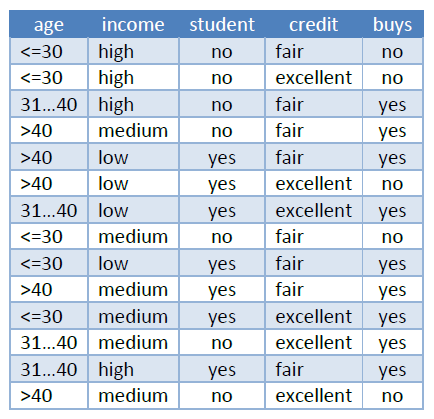

<h2>Answer</h2>
we have following probabilities:<br>
P(buys = yes) = 9/14<br>
P(student = yes) = 7/14, P(student = yes | buys = yes) = 6/9<br>
P(age<=30) = 5/14, P(age<=30 | buys = yes) = 2/9<br>
P(income = medium) = 6/14, P(income = medium | buys = yes) = 4/9<br>
P(credit = fair) = 8/14, P(credit = fair | buys = yes) = 6/9 <br><br>
<strong>a.</strong> We need to calculate P(buys = yes | student = yes , age<=30, income = medium, credit = fair). <br>
P(buys = yes| student = yes , age<=30, income = medium, credit = fair) * P(student = yes , age<=30, income = medium, credit = fair) = P(student = yes , age<=30, income = medium, credit = fair | buys = yes) * P(buys = yes)<br>
<strong>$P(buys = yes| student = yes , age<=30, income = medium, credit = fair) = \frac{P(student = yes , age<=30, income = medium, credit = fair | buys = yes) * P(buys = yes)}{P(student = yes , age<=30, income = medium, credit = fair)}$</strong>
= $\frac{\frac{6}{9}*\frac{2}{9}*\frac{4}{9}*\frac{6}{9}*\frac{9}{14}} { \frac{7}{14}*\frac{5}{14}*\frac{6}{14}*\frac{8}{14}}$
= $\frac{0.028}{0.044}$ = 0.64<br><br>
<strong>b.</strong> We need to calculate P(buys = yes | student = yes).<br>
P(buys = yes | student = yes) * P(student = yes) = P(student = yes | buys = yes) * P(buys = yes)<br>
<strong>$P(buys = yes | student = yes) = \frac{P(student = yes | buys = yes) * P(buys = yes)}{P(student = yes)} = \frac{\frac{6}{9}*\frac{9}{14}}{\frac{7}{14}} = \frac{0.43}{0.5} = 0.86$</strong>

<h2>Question 4</h2>
<p>If $\sigma$ is sigmoid function, prove that $\frac{\partial\sigma(x)}{\partial x} = \sigma(x)*(1-\sigma(x))$</p>

<h2>Answer</h2>
$\sigma(x) = \frac{1}{1 + e^{-x}}$<br>
$\frac{d \sigma(x)}{dx} = \frac {d}{dx} [\frac{1}{1 + e^{-x}}] = \frac {d}{dx}(1 + e^{-x})^{-1} = (1 + e^{-x})^{-2}(-e^{-x}) = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{1}{1 + e^{-x}}.\frac{e^{-x}}{1 + e^{-x}} = \frac{1}{1 + e^{-x}} . \frac{(1 + e^{-x}) - 1}{1 + e^{-x}} $<br>$= \frac{1}{1 + e^{-x}} .(\frac{1 + e^{-x}}{1 + e^{-x}} - \frac{1}{1 + e^{-x}}) = \frac{1}{1 + e^{-x}} .(1 - \frac{1}{1 + e^{-x}}) = \sigma(x).(1-\sigma(x))$

<h2>Question 5</h2>
<p>Logistic regression is a discriminative method in which posterior probability:</p>
<strong>a. </strong>in a binary classification is estimated as $P(C_1|x) = 1 - P(C_2|x) = \sigma(w^Tx)$. Write the cost function of this estimation. Calculate the gradient of cost function based on weight coefficients.<br>
<strong>b. </strong>in a softmax version of multi classification, is estimated as $P(C_k|x) = \frac{exp[w_k^Tx]}{exp[w_1^Tx] + exp[w_2^Tx] + ... + exp[w_K^Tx]}$. calculate the cost function of this estimation. what's the name of this cost function? Calculate the gradient of cost function based on weight coefficients.<br>

<h2>Answer</h2>
<strong>a.</strong> In binary classification using logistic regression, the cost function is typically defined as the negative log-likelihood, which is minimized during the training process. The negative log-likelihood cost function for logistic regression is given by:<br>
$J(𝑤) = -[ylog(\sigma(𝑤^tx)) + (1 - y)log(1 - \sigma(𝑤^tx))]$<br>
The gradient of the cost function for logistic regression is given by:<br>
$\nabla j(𝑤) = x(\sigma(w^tx) - y)$<br><br>
<strong>b.</strong>In the softmax version of multi-class classification using logistic regression, the cost function is typically the <strong>cross-entropy loss function</strong>. The cross-entropy loss measures the dissimilarity between the predicted probabilities and the true class labels. The cost function for softmax logistic regression is given by:<br>
$J(𝑤) = -\sigma[y_k \ log( 𝑃(C_k|x) )]$

<h2>Question 6</h2>
<p>in a binary linear problem with likelihood functions $P(x|C_1) = N(0,0.5) , P(x|C_2) = N(1,0.5)$, equal prior probabilities and cost matrix :$\begin{vmatrix}
0 & 0.5\\
1 & 0
\end{vmatrix}$, calculate the threshold of variable x for each of two classes $C_1 \ and \ C_2$. </p>

<h2>answer</h2>
$\frac{0.5}{0.5}e^{-\frac{(x-1)^2}{2*0.5^2}} = \frac{1}{0.5}e^{-\frac{(x-0)^2}{2*0.5^2}}$<br>
from the above equation we can calculate x.
x = 0.67

<h2>Question 7</h2>
<p>Hear dataset consists of 1025 samples and each of them has 13 features. split this data set into train(75%) and test(25%) sets. Use LR and NB to train models then assess their performance using k-fold cross validation(k=4) based on F1 score. when using NB assume that features are independent.</p>

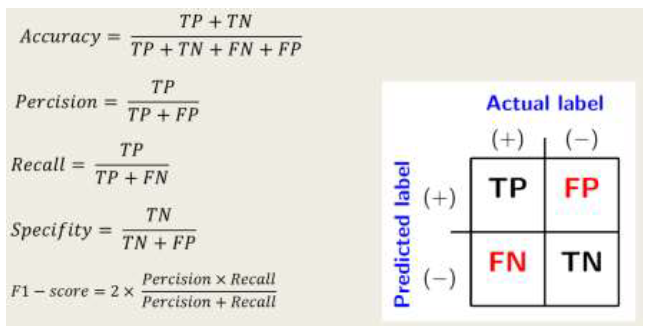

<h2>Answer</h2>

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
target = data.iloc[:, -1].values
features = data.iloc[:, :-1].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)
LR = LogisticRegression(max_iter=1000)
NB = GaussianNB()

LR_S = cross_val_score(LR, X_train, y_train, cv=4, scoring='f1')
LR_mean_S = LR_S.mean()

NB_S = cross_val_score(NB, X_train, y_train, cv=4, scoring='f1')
NB_mean_S = NB_S.mean()

print("LR F1 score is: ", LR_mean_S)
print("NB F1 score is: ", NB_mean_S)

LR F1 score is:  0.8424645676767548
NB F1 score is:  0.8257957908889583
